# Introduction to coding

### Lesson 3

#### Author

Oliver Sheridan-Methven

##### Date

September 2017.
    
#### Description:

An introduction to the three main python packages:
   
 * Numpy
 * Matplotlib 
 * Pandas
 


The following three packages are so frequently used by python programmers, that it is important to set aside some time to learn how to use them. These are numpy, matplotlib, and pandas. 

 * Numpy 
	- At the core of almost all python packages which require any numerical work is numpy. Numpy is extremely fast, much faster than pure python, so if you re looking for performance increases then numpy is often a good starting point. 
 * Matplotlib 
	- This is the de facto package for producing plots in Python. It can produce some very high quality plots, but is designed to compliment python, not the other way round. (For very advanced plotting I would recommend seeing `gnuplot`).
 * Pandas
	- If ever you want to handle, process, or produce data, then pandas should be your first point of call. In its simpest form, it is not to disimilar from an excell spreadsheet in Python. However, it has phenominal power for diving into data and exploring it.

These three packages are so popular that they are almost always imported as follows: 

In [4]:
import numpy as np
import matplotlib as mpl
# mpl.use('TkAgg')  # This is useful for an interactive backend. You can likely omit this. 
import matplotlib.pylab as plt  # An alternative to pylab is pyplot (although pylab has more features for interactive plotting).
import pandas as pd

### Numpy

Numpy has many features at its disposal: containers and numerical routines. The main numpy containers are:

 * Arrays.
 * Matrices.

To compliment these are many numerical routines and functions:

 * Min, max, medians, percentiles, etc.
 * Sin, cos, tan, hyperbolic functions, exponentials and logarithms. 
 * Complex numbers.
 * Vectorisation wrappers. (`vectorize` uses American spelling, as do most things in programming). 
 * Numerical integration and differentiation. (For symbolic calculus see `sympy`).

The first step here will be to introduce the core container in numpy, the array. An array is very similar to a list, but a list is very robust and flexible, but to achieve this is make little assumptions (or optimisations) about what it's holding. However, numpy arrays use underlying C arrays, and so will determine what they're holding, and it is good practice to ensure arrays contain things of the same type (try to avoid mixing strings and arrays), although they can hold much the same things as a python list. 

In [4]:
l = [1.0, 2.0, 3.0]  # A python list. 
a = np.array([1.0, 2.0, 3.0])  # A numpy array.

Operations on numpy arrays typically work element wise, but where lists are more abstract and flexible containers, they typicall don't work element wise. Consider the following:

In [5]:
print l + l
print a + a

[1.0, 2.0, 3.0, 1.0, 2.0, 3.0]
[ 2.  4.  6.]


So lets consider some numerical work with numpy. To do this we cast these arrays as numpy matrices. 

In [16]:
A = 1.0 * np.matrix([[7, 2, 1], 
                     [0, 3, -1], 
                     [-3, 4, -2]])
x = np.array([3.0, 1.0, -2.0]).reshape((3, 1))  # we reshape this into a column vector. 
b = np.array([[21.0, 5.0, -1.0]]).T  # We take the transpose. 
print('A =\n\n{}\n\nb =\n\n{}\n\nx =\n\n{}\n\n'.format(A, b, x))
print('A * x =\n\n{}\n\n'.format(A * x))

a_approx = np.linalg.solve(A, b)
print('The solution to Ax = b is:\n\n{}'.format(a_approx))

A =

[[ 7.  2.  1.]
 [ 0.  3. -1.]
 [-3.  4. -2.]]

b =

[[ 21.]
 [  5.]
 [ -1.]]

x =

[[ 3.]
 [ 1.]
 [-2.]]


A * x =

[[ 21.]
 [  5.]
 [ -1.]]


The solution to Ax = b is:

[[ 3.]
 [ 1.]
 [-2.]]


We can also start to see some of the useful statistical tools available in numpy. 

In [2]:
mu, sigma, n = 2.0, 3.0, 30
y = np.random.normal(loc=mu, scale=sigma, size=n)
np.max(y)
np.mean(y)
np.std(y)
p = np.percentile(y, 90)
y > p
print y[y>p]

[ 5.81416688  5.91435013  5.45271345]


A nice example that uses these matrix operations is known as SVD (Singular value decomposition). This is a very powerful theorem in maths with countless applications. One interesting application is in image compression. Compressing an image with this method is very simple, and an example is given below:

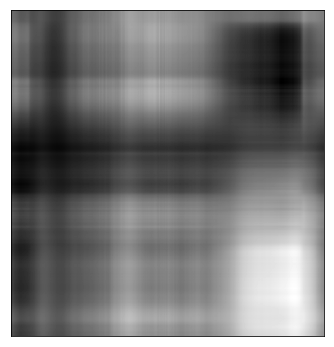

In [7]:
from lesson_3.svd_example import colour_png_to_greyscale, plot_svd_image
import numpy as np
import matplotlib.pylab as plt

l = colour_png_to_greyscale()
N = 2
u, s, v = np.linalg.svd(l)
u, s, v = [np.mat(u[:, :N]), np.mat(np.diag(s[:N])), np.mat(v[:N, :])] 
g = np.array(u*s*v)

plt.figure(figsize=(6,6))
plot_svd_image(2)
plt.show()

If we decrease the degree of compression (corresponging to keeping a larger number of eigen values), then slowly the resolution increases. The above file sizes change from 100KB up to 2MB, where the final image is the original image, which is 8MB, which represents a large degree of image compression.

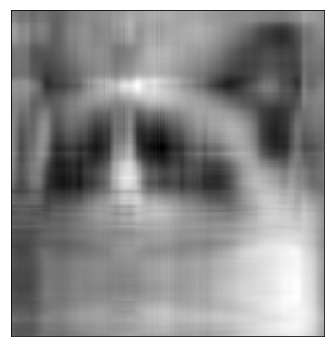

In [12]:
plt.figure(figsize=(6,6))
plot_svd_image(4)
plt.show()

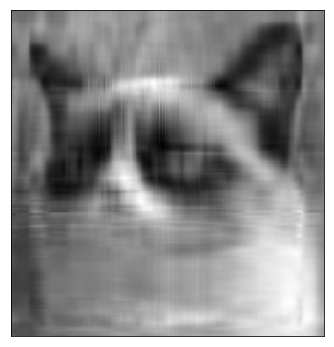

In [13]:
plt.figure(figsize=(6,6))
plot_svd_image(8)
plt.show()

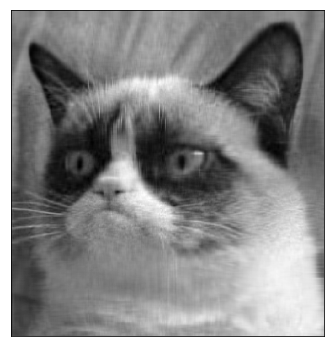

In [14]:
plt.figure(figsize=(6,6))
plot_svd_image(32)
plt.show()

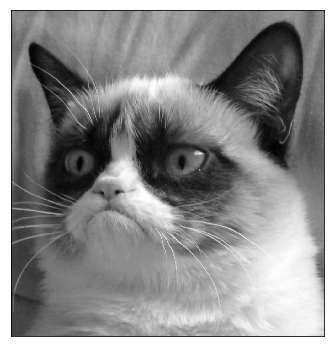

In [15]:
plt.figure(figsize=(6,6))
plot_svd_image(256)
plt.show()

### Matplotlib

Matplotlib is a very powerful plotting package to accompany python, and many packages utilise this (e.g. pandas). The interface is either through its pylab or pyplot module (pylab is usualy preferable). This can be used to plot scatter plots, bar charts, histograms, polar plots, 3D plots, etc. There is a lot that matplotlib can plot, but if you need something a bit more powerful, then I would recommend gnuplot. 


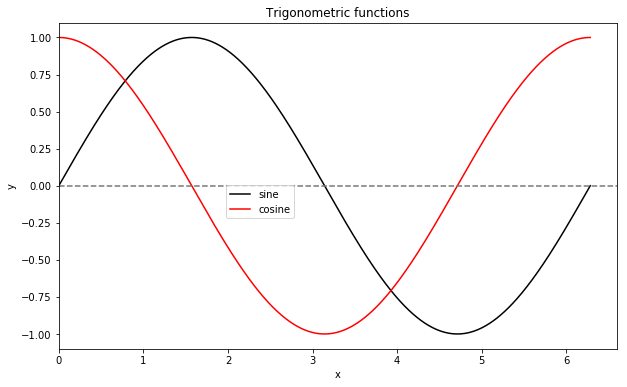

In [7]:
x = np.linspace(0, 2*np.pi, 1000)

plt.figure(figsize=(10,6))  # This line just ensures I have a nice big plot.
plt.plot(x, np.sin(x), 'k-', label='sine')
plt.plot(x, np.cos(x), 'r-', label='cosine')
plt.title('Trigonometric functions')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, ls='--', color='#777777')  # A nice visual aid. 
plt.xlim((0, None))
plt.legend(loc=(0.3, 0.4))
plt.show()

Usually in python it is sufficient to interface with the plot using the `plt` handle. However, many people prefer to interface with the figure, axes, legend, color bar, etc., as their own objects, which I have found quite useful for plots using subfigures. 

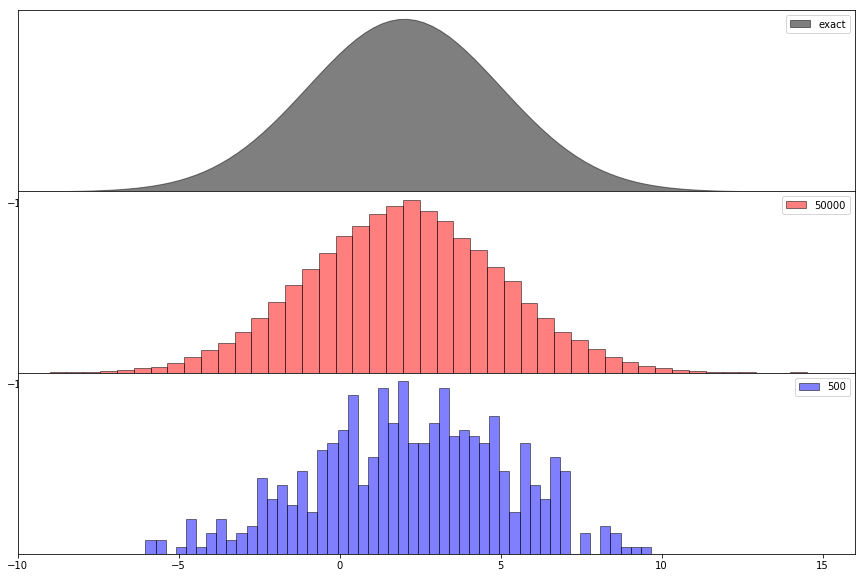

In [38]:
from scipy.stats import norm
plt.clf()
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
x_lims = (-10, 16)
x = np.linspace(*x_lims, num=100)
ax[0].fill_between(x, norm.pdf(x, loc=mu, scale=sigma), where=[True] * len(x), interpolate=True, color='k', alpha=0.5, label='exact') 
ax[1].hist(norm.rvs(loc=mu, scale=sigma, size=50000), bins=50, color='r', alpha=0.5, edgecolor='black', linewidth=1.0, label='50000', normed=True)
ax[2].hist(norm.rvs(loc=mu, scale=sigma, size=500), bins=50, color='b', alpha=0.5, edgecolor='black', linewidth=1.0, label='500', normed=True)
for a in ax:
    a.set_xlim(*x_lims)
    a.set_ylim((0, None))
    a.legend(loc='upper right')
    a.set_yticks([])
fig.subplots_adjust(wspace=0, hspace=0)


plt.show()

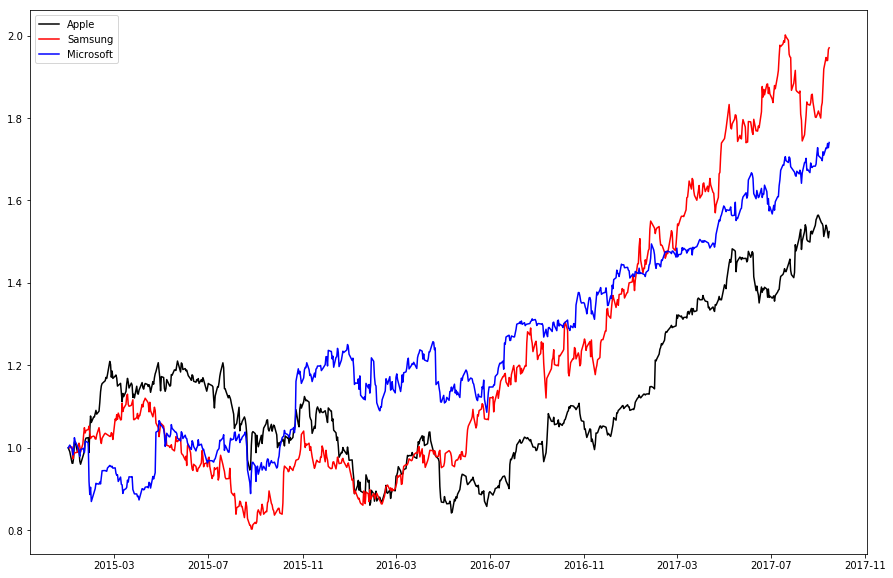

In [43]:
import datetime as dt
import pandas_datareader as pdr

start, end = dt.datetime(year=2015, month=1, day=1).date(), dt.date.today()
past_6_months = end - dt.timedelta(days=365 // 2)

apple, samsung, microsoft = [pdr.get_data_yahoo(name, start, end) for name in ['AAPL', '005930.KS', 'MSFT']]
apple, samsung, microsoft = [df.drop(['Volume'], axis=1) for df in [apple, samsung, microsoft]]
apple, samsung, microsoft = [df.apply(lambda x: x / np.array(df.iloc[0, :]), axis=1) for df in [apple, samsung, microsoft]] 

plt.clf()
plt.figure(figsize=(15,10))  # This line just ensures I have a nice big plot.
plt.plot(apple['Adj Close'], 'k-', label='Apple')
plt.plot(samsung['Adj Close'], 'r-', label='Samsung')
plt.plot(microsoft['Adj Close'], 'b-', label='Microsoft')
plt.legend()
plt.show()

              apple   samsung  microsoft
apple      1.000000  0.039305   0.494088
samsung    0.039305  1.000000   0.023831
microsoft  0.494088  0.023831   1.000000


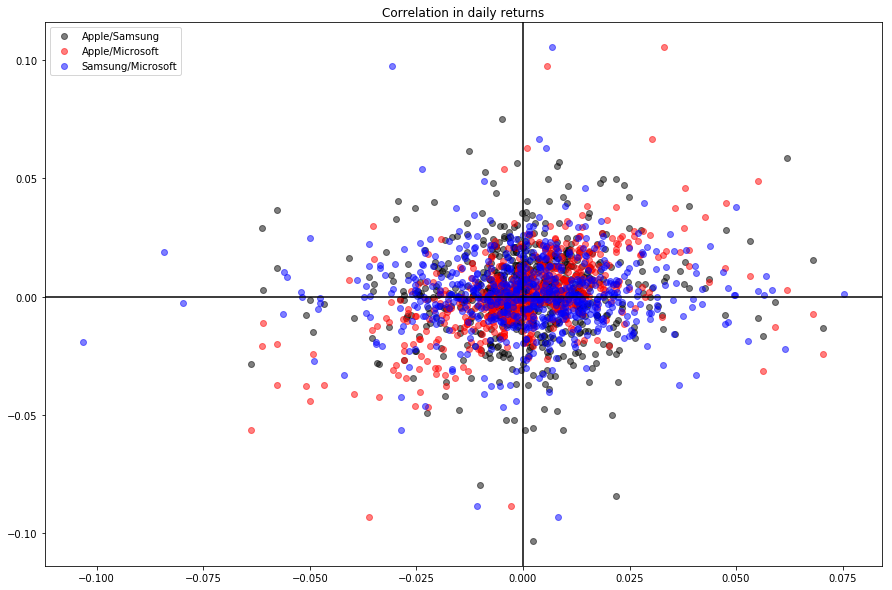

In [52]:
#  We do some data processing using pandas.
import pandas as pd
df = pd.concat([apple['Adj Close'],  samsung['Adj Close'], microsoft['Adj Close']], axis=1)
df.columns = ['apple', 'samsung', 'microsoft']
df = df.dropna()
df = df.apply(lambda x: x / np.array(df.iloc[0, :]), axis=1)
ret = df.diff().dropna()

# Plotting some nice results. 
plt.clf()
plt.figure(figsize=(15,10))  # This line just ensures I have a nice big plot.
plt.plot(ret['apple'], ret['samsung'], 'ko', alpha=0.5, label='Apple/Samsung')
plt.plot(ret['apple'], ret['microsoft'], 'ro', alpha=0.5, label='Apple/Microsoft')
plt.plot(ret['samsung'], ret['microsoft'], 'bo', alpha=0.5, label='Samsung/Microsoft')
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.title('Correlation in daily returns')
plt.legend(loc='upper left')
print ret.corr()
plt.show()

### Pandas

In some of the above examples you may have noticed that we have begun to handle and process data using the pandas module. The centre piece of the `pandas` module is its `DataFrame` container. At a glance this looks very similar to an excel spreadsheet ('pandas' standas for 'panel data'). We can process the data in columns / rows, and access these using the `[]` operator. 

In [53]:
import pandas as pd

df = pd.DataFrame([range(i, i+4) for i in range(0, 32, 4)], columns=list('abcd'))
print df
print df.describe()

    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19
5  20  21  22  23
6  24  25  26  27
7  28  29  30  31
               a          b          c          d
count   8.000000   8.000000   8.000000   8.000000
mean   14.000000  15.000000  16.000000  17.000000
std     9.797959   9.797959   9.797959   9.797959
min     0.000000   1.000000   2.000000   3.000000
25%     7.000000   8.000000   9.000000  10.000000
50%    14.000000  15.000000  16.000000  17.000000
75%    21.000000  22.000000  23.000000  24.000000
max    28.000000  29.000000  30.000000  31.000000


We access a column using `df[column_name]` (returning a `pd.Series` object!) and multiple columns using `df[[col_1, col_2]]`. Since it is so frequent that we want to index a range of rows, the colon `:` operator in the `[]` will produce slice based on the index values (see also `.loc` and `.iloc`). 

In [59]:
print('{}\n\n{}\n\n{}'.format(df['a'], df[['a', 'b']], df[2:5]))

0     0
1     4
2     8
3    12
4    16
5    20
6    24
7    28
Name: a, dtype: int64

    a   b
0   0   1
1   4   5
2   8   9
3  12  13
4  16  17
5  20  21
6  24  25
7  28  29

    a   b   c   d
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19


We can easily create a new column and manipulate columns (similar to numpy arrays).

In [64]:
df['e'] = df['a'] + np.log(df['b'])
print(df)

    a   b   c   d          e
0   0   1   2   3   0.000000
1   4   5   6   7   5.609438
2   8   9  10  11  10.197225
3  12  13  14  15  14.564949
4  16  17  18  19  18.833213
5  20  21  22  23  23.044522
6  24  25  26  27  27.218876
7  28  29  30  31  31.367296


One of the nice things is that dataframes are good at holding different things, and at dealing with missing data:

In [67]:
import string

df['f'] = df['e'].apply(lambda x: string.ascii_uppercase[int(x) % 26])  # Making a new column
df.loc[[2, 3], ['a', 'c']] = np.nan  # Adding in some missing data

Notice that we are making use of the `DataFrame.apply` method (similar to the `transform` method). This has the signature

```
DataFrame.apply(function, axis, ...)
```

where axis denotes either row-wise or column-wise opterations. This is very useful for non generic data manipulations (which is likely). 

A last useful feature that is important to know is that we can index based on column values:

In [68]:
df

,a,b,c,d,e,f
0,0.0,1,2.0,3,0.000000,A
1,4.0,5,6.0,7,5.609438,F
2,NaN,9,NaN,11,10.197225,K
3,NaN,13,NaN,15,14.564949,O
4,16.0,17,18.0,19,18.833213,S
5,20.0,21,22.0,23,23.044522,X
6,24.0,25,26.0,27,27.218876,B
7,28.0,29,30.0,31,31.367296,F


In [71]:
df[df['e'] % 1 >= 0.5]

,a,b,c,d,e,f
1,4.0,5,6.0,7,5.609438,F
3,NaN,13,NaN,15,14.564949,O
4,16.0,17,18.0,19,18.833213,S


To get an idea for how to handle some data there are three example data sets attached which include:

 * The first 1000 prime numbers
 * The top 500 albums (Rolling Stones).
 * The top 100 movies on Rotten tomatoes. 
 * Passenger information from the Titanic.
 * An unknown data set called `something.csv`, (can you guess what it is?).

As an example to get you started:

In [81]:
df = pd.read_csv('lesson_3/Rotten_Tomatoes_100_Movies.csv')
df.head()

,Rank,Rating,Title,No. of Reviews
0,1,99%,The Wizard of Oz (1939),109
1,2,100%,The Third Man (1949),76
2,3,100%,Citizen Kane (1941),73
3,4,97%,Mad Max: Fury Road (2015),357
4,5,100%,Das Cabinet des Dr. Caligari. (The Cabinet of ...,48


In [82]:
df['year'] = df['Title'].apply(lambda x: x[-5:-1])
df['Title'] = df['Title'].apply(lambda x: x[:(k for k, v in enumerate(x) if v == '(').next()])
df['Rating'] = df['Rating'].apply(lambda x: x[:-1])
df = df.set_index(['Rank'])
df = df.rename(columns={'No. of Reviews': 'reviews'})
df.head()

,Rating,Title,reviews,year
Rank,,,,
1,99,The Wizard of Oz,109,1939
2,100,The Third Man,76,1949
3,100,Citizen Kane,73,1941
4,97,Mad Max: Fury Road,357,2015
5,100,Das Cabinet des Dr. Caligari.,48,1920
